<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Temperature_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Điều khiển nhiệt độ dùng fuzzy logic

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [ ]:
universe = np.linspace(0,40,200) 
universe1 = np.linspace(0,100,200)
universe2 = np.linspace(0,100,200)
temp = ctrl.Antecedent(universe, 'temp')
humid = ctrl.Antecedent(universe1, 'humid')
fan = ctrl.Consequent(universe2, 'fan')

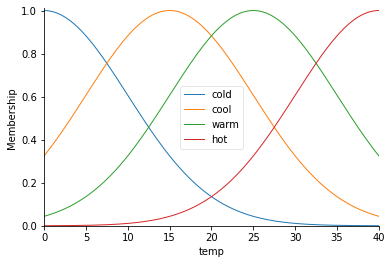

In [ ]:
temp['cold'] = fuzzy.gaussmf(temp.universe,0,10)
temp['cool'] = fuzzy.gaussmf(temp.universe,15,10)
temp['warm'] = fuzzy.gaussmf(temp.universe,25,10)
temp['hot'] = fuzzy.gaussmf(temp.universe,40,10)
temp.view()

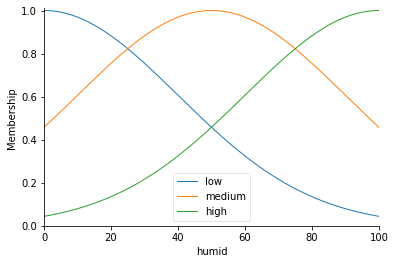

In [ ]:
humid['low'] = fuzzy.gaussmf(humid.universe,0,40)
humid['medium'] = fuzzy.gaussmf(humid.universe,50,40)
humid['high'] = fuzzy.gaussmf(humid.universe,100,40)
humid.view()

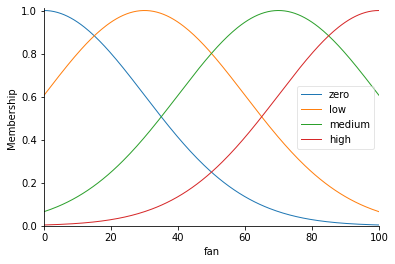

In [ ]:
fan['zero'] = fuzzy.gaussmf(fan.universe,0,30)
fan['low'] = fuzzy.gaussmf(fan.universe,30,30)
fan['medium'] = fuzzy.gaussmf(fan.universe,70,30)
fan['high'] = fuzzy.gaussmf(fan.universe,100,30)
fan.view()

In [ ]:
#Rule
rule0 = ctrl.Rule(antecedent=((temp['cool']&humid['high'])|(temp['cold']&humid['medium'])|
                              (temp['cold']&humid['low'])), consequent= fan['medium'])

rule1 = ctrl.Rule(antecedent=((temp['warm']&humid['high'])|(temp['cool']&humid['medium'])|
                              (temp['cool']&humid['low'])), consequent= fan['low'])

rule2 = ctrl.Rule(antecedent=((temp['hot']&humid['high'])|(temp['warm']&humid['medium'])|
                              (temp['hot']&humid['medium'])|
                              (temp['hot']&humid['low'])|
                              (temp['warm']&humid['low'])), consequent= fan['zero'])

rule3 = ctrl.Rule(antecedent=((temp['cold']&humid['high'])), consequent= fan['high'])

In [ ]:
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

System  = ctrl.ControlSystem(rules = [rule1, rule2, rule0])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(0,40,61)
upSampled2 = np.linspace(0,100,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)


In [ ]:
for i in range(61):
  for j in range(61):
    sim.input['temp']= x[i,j]
    sim.input['humid']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['fan']

<ipython-input-58-9fb1a9ee5261>:5: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-58-9fb1a9ee5261>:6: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-58-9fb1a9ee5261>:7: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)


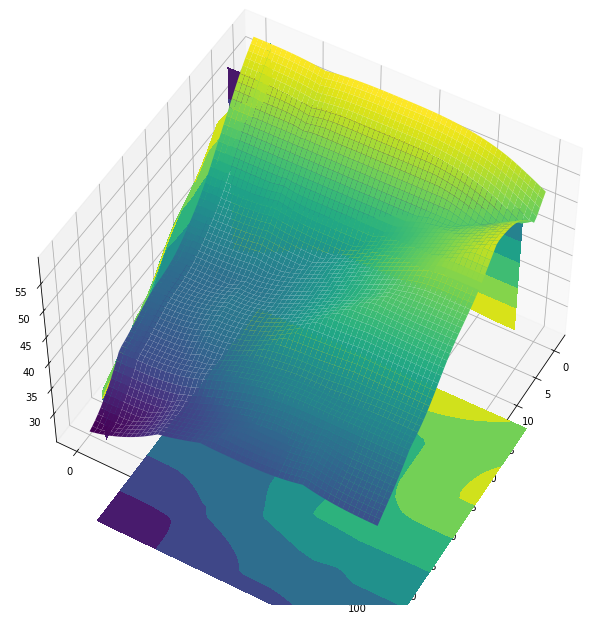

In [ ]:
fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,30)